## Loan Prediction Problem

### This excersice is designed to solve binary classification.

#### Expectations:

    1. Introduction to the problem

    2. Exploratory Data Analysis (EDA) and Pre-Processing

    3. Model building and Feature engineering
    
#### Problem Statement:

Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. Customers first apply for a home loan after that company validates the customer’s eligibility for a loan. The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer segments, that are eligible for loan amounts so that they can specifically target these customers.

It is a classification problem where we have to predict whether a loan would be approved or not. ttoo

https://www.analyticsvidhya.com/blog/2022/05/loan-prediction-problem-from-scratch-to-end/

In [ ]:
# Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Functions we are down the road:

In [2]:
# Function 1

def bar_plot(colomn, bar_orientation = "v", number_format = "f"):
    
    """THIS FUNCTION WILL GRAPH THE BAR PLOT EITHER IN PERCENTAGE OR REAL VALUE:
    
    We have 1 mandatory parameter, and 2 set up by default. On the other hand, these are the we have 3 parameters:
            
        a) Column to graph (MANDATORY)
        b) Bar orientation (1. Horizontal (h) or 2. Vertical (v), set by default)
        c) Number display (1. Percentage (p) or 2. Float (f, set by default))
    
    CONDITIONS:
    
        1. Vertical graph with f
        2. Vertical graph with p
        3. Horizontal graph with f
        4. Horizontal graph with p
    
    """
    
    bar = None # Container (graph)
    X = [] # Final X labels
    y = colomn.value_counts().unique() # y values    
    
    # THIS SECTION WOULD PARSE ALL THE LABELS INTO A STRING:        
    original_X = list(colomn.value_counts(normalize = True).index) # Say, labels
     
    # TURNING THE LABELS INTO A STRING    
    for item in original_X:
        X.append(str(item))
        # End of for    
    
    title = colomn.value_counts().name # Getting the title
    
    # CONDITIONS: Since the vertical one is set by default, I am just checking the letter h
    
    # bar = plt.barh(X, y, fc = "lightgray", ec = "black")
    
    # 1. horizontal chart with floats
    if((bar_orientation == "h") and (number_format == "f")):
        number_format = "%g" # Format per default
        bar = plt.barh(X, y, color=colors, ec = "black")
    # 2. horizontal chart with percentages
    elif(bar_orientation == "h" and number_format == "p"):        
        y = colomn.value_counts(normalize = True).unique()*100 # y, the 100 is to show it in percentages.
        number_format = '%.3f%%' # Format of 3 decimal and in percentage
        plt.xlim(0, 100) # X limit to 100%
        bar = plt.barh(X, y, color=colors, ec = "black")
    # 3. vertical chart with percentages
    elif(bar_orientation == "v" and number_format == "p"):
        number_format = '%.3f%%' # Format of 3 decimal and in percentage
        y = colomn.value_counts(normalize = True).unique()*100 # y, the 100 is to show it in percentages.
        plt.ylim(0, 100) # y limit to 100%
        bar = plt.bar(X, y, color=colors, ec = "black")
    # 4. vertical chart with floats (default graph)    
    else:
        number_format = "%g" # Format per default
        bar = plt.bar(X, y, color=colors,ec = "black")
    
      
    plt.bar_label(bar, label_type="edge", padding = 1, fmt=number_format)
    plt.title(title)
    plt.tight_layout()

In [3]:
# Function 2

def groupped_bar(data, name = "COLUMN NAME", percentage = "f"):
    
    """GRAPHING THE GROUPPED BARS
    
    1. Getting the names we are going to put in.
    2. Getting the values for the bars. (Columns)
    3. Getting the x_ticks"""

    # FORMAT NUMBER
    number_format = "%g"

    # LABELS
    
    
    x_label = list(data.columns) # Ledgers (columns)
    x_ticks_values = list(data.index.values) # For the x values on the graphs
    
        
    # WIDTH
    
    w = 0.4

    # DATA: Format - N - Y
    
    # CREATING DICT SO WE CAN HAVE THE REQUIRED NUMBER OF VARIABLES  
    
    ledger = {} # Ledger
    data_bar = {} # Data to plot
    bar = {} # Creating the barchart
    
    for suffix in range(len(x_label)): # Extracting data       
                
        index = x_label[suffix] # Picking the column (Ledgers)
        
        # Data for the chart
        data_bar["data_bar_" + str(suffix + 1)] = list(data[index]) # Taking the data to plot
        ledger["ledger_" + str(suffix + 1)] = index
                
        # End of 4


    # PERCENTAGES IF NEEDED.
    
    if(percentage == "p"): 
        
        plt.ylim(0, 110)
        number_format = '%.2f%%' # Format of 3 decimal and in percentage
        results_bar_1 = [] # To get the results
        results_bar_2 = []
        last_value = [] # To get the previous value
        current_value = [] # to get the current value
        count = 0
        
        for key in data_bar.values():
        # CAPTURING THE KEY VALUES, SO I CAN GET THE LIST OF VALUES FROM THE DICT
        # WE NEED TO CAPTURE THE VALUES INDIVIDUALLY

            # print(key)
            if(count == 0):
                results = key
                count +=1
            else:
                # ADDING THE FINAL VALUES TO A DICT FOR LATER ON
                last_value = results
                results = []
                for operation in range(0, len(key)):

                    # print(last_value[operation])
                    # print(key[operation]) 

                    # CALCULATING THE PERCENTAGE FOR N AND Y
                    
                    # N
                    results_bar_1.append((last_value[operation])/(last_value[operation] + key[operation])*100) # Percentage for N

                    # Y
                    results_bar_2.append((key[operation])/(last_value[operation] + key[operation])*100) # Percentage for Y

            # End of 4

        # REPLACING THE VALUES ON THE ORIGINAL DICT

        data_bar["data_bar_1"] = results_bar_1
        data_bar["data_bar_2"] = results_bar_2
        
        
        # End of if
        
    
    
    # LOCATIONS
    location_x = np.arange(len(x_ticks_values)) # location of x ticks of the first bar
    location_y = [i + w for i in location_x] # location of x ticks of the second bar
    

    # DRAWING THE BARS: Saving it into a variable to put the values on top   

    for suffix in range(len(data_bar)):
        
        if(suffix == 0):
            bar["bar_" + str(suffix + 1)] = plt.bar(location_x, data_bar["data_bar_" + str(suffix + 1)], w, 
                                                    label = ledger["ledger_" + str(suffix + 1)], 
                                                    ec = "black", color = "#FFA07A")
        else:
            bar["bar_" + str(suffix + 1)] = plt.bar(location_y, data_bar["data_bar_" + str(suffix + 1)], w, 
                                                    label = ledger["ledger_" + str(suffix + 1)], 
                                                    ec = "black", color = "#90EE90")
        
        # bar_1 = plt.bar(location_x, "data_bar_" + str(suffix + 1), w, label = "ledger_" + str(suffix + 1), ec = "black")
        # bar_2 = plt.bar(location_x, "data_bar_" + str(suffix + 1), w, label = "ledger_" + str(suffix + 1), ec = "black")
    
    # TITLE
    plt.title(name + " vs LOAN STATUS")

    # NAME OF THE LABELS    
    plt.ylabel("APPROVAL RATE")

    # NAME OF THE VALUES ON X
    plt.xticks(location_x + w/2, list(data.index)) # (location + width/2, label)
    plt.legend()

    # PUTTING THE NUMBERS ON TOP

    for suffix in range(len(bar)):
        plt.bar_label(bar["bar_" + str(suffix + 1)], label_type="edge", padding = 0.5, fmt=number_format)  
        
    plt.tight_layout()

In [4]:
# Function 3:

def fill_na(df):
    
    """THIS FUNCTION WILL FILL THE NA BASED ON THE DATA TYPE
    
        1. IF IT IS STRING, WILL FILL WITH MODE
        2. OTHERWISE, WILL FILL WITH MEDIAN"""
    
    column_names = list(df.columns) # Getting the names so we can loop through
    
    for name in column_names:
        
        if(df[name].dtypes != "object" and df[name].isna().sum() > 0): # numbers, we apply median
            df[name].fillna(df[name].median(), inplace = True)            
        elif(df[name].dtypes == "object" and df[name].isna().sum() > 0): # Objects, we apply mode
            df[name].fillna(df[name].mode()[0], inplace = True)

#### End of functions.

In [5]:
# Importing data:

# Work Station 1
# train = pd.read_csv(r"C:\Users\AAvendano\Downloads\PY\ML\MACHINE-LEARNING-AND-DATA-SCIENCE-PROJECTS\CLASSIFICATION\LOAN_PREDICTION\Data_set\train_u6lujuX_CVtuZ9i.csv")
#test = pd.read_csv(r"C:\Users\AAvendano\Downloads\PY\ML\MACHINE-LEARNING-AND-DATA-SCIENCE-PROJECTS\CLASSIFICATION\LOAN_PREDICTION\Data_set\test_Y3wMUE5_7gLdaTN.csv")

# Work Station 2
# train = pd.read_csv(r"D:\PROJECTS\MACHINE-LEARNING-AND-DATA-SCIENCE-PROJECTS\CLASSIFICATION\LOAN_PREDICTION\Data_set\train_u6lujuX_CVtuZ9i.csv")
# test = pd.read_csv(r"D:\PROJECTS\MACHINE-LEARNING-AND-DATA-SCIENCE-PROJECTS\CLASSIFICATION\LOAN_PREDICTION\Data_set\test_Y3wMUE5_7gLdaTN.csv")

# Work Station 3 (Ubuntu)
train = pd.read_csv(r'/home/alberto/Documents/projects/MACHINE-LEARNING-AND-DATA-SCIENCE-PROJECTS/CLASSIFICATION/LOAN_PREDICTION/Data_set/train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv(r'/home/alberto/Documents/projects/MACHINE-LEARNING-AND-DATA-SCIENCE-PROJECTS/CLASSIFICATION/LOAN_PREDICTION/Data_set/test_Y3wMUE5_7gLdaTN.csv')


In [6]:
# To keep the original data, it is a good practice to make a copy. Let's just do that:
train_original = train.copy()
test_original = test.copy()

In [7]:
# Checking the data we have
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### The only difference between the data sets are the Loan status which is the target. That's the one we are going to predict.

## Description for each variable present in the data frame:

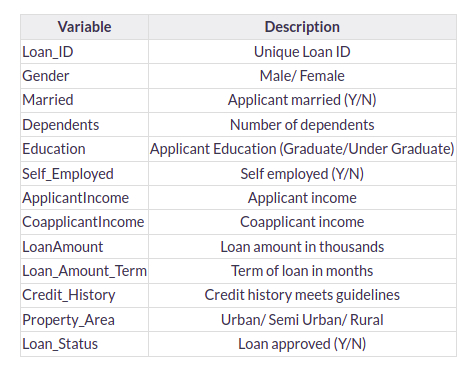

In [9]:
# Understanding the data types:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### We have 6 categorical variables which are:  

    Loan_ID
    Gender
    Married
    Dependents
    Education
    Self_Employed
    Loan_Status
    
### We have 6 numerical variables:

    ApplicantIncome        
    CoapplicantIncome
    LoanAmount
    Loan_Amount_Term
    Credit_History
    Property_Area

In [11]:
# Let's now look at the shape:
train.shape, test.shape

((614, 13), (367, 12))

## Univariate Analysis.

Loan_Status: As it is a categorical variable, let us look at its frequency table, percentage distribution, and bar plot.

#### THIS SECTION WILL MAKE ALL THE GRAPHS LOOK BETTER:

In [12]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks 

plt.rc('axes', titlesize=18)     # fontsize of the axes title 
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels 
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels 
plt.rc('legend', fontsize=13)    # legend fontsize 
plt.rc('font', size=13)          # controls default text sizes
colors = sns.color_palette('pastel') 

In [13]:
# Checking the frecuency
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

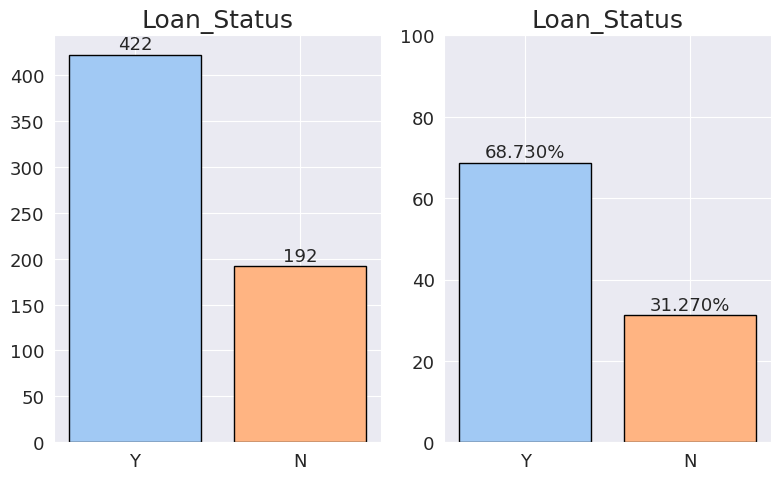

In [14]:
# PLOTTING THE VALUES AND PERCENTAGES
fig=plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
bar_plot(train["Loan_Status"], "v", "f")

plt.subplot(1,2,2)
bar_plot(train["Loan_Status"], "v", "p")

### We can see the distribution here. Around 69% of people got approve in regard to the loan from the total amount of people is 614 (442+192). That's to say, So, from 442 out of 614 got approved.

### Now, let’s visualize each variable separately:

    Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History)

    Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

    Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Loan_Status)
    
### Independent Variable (Categorical): (Gender, Married, Self_Employed, Credit_History)

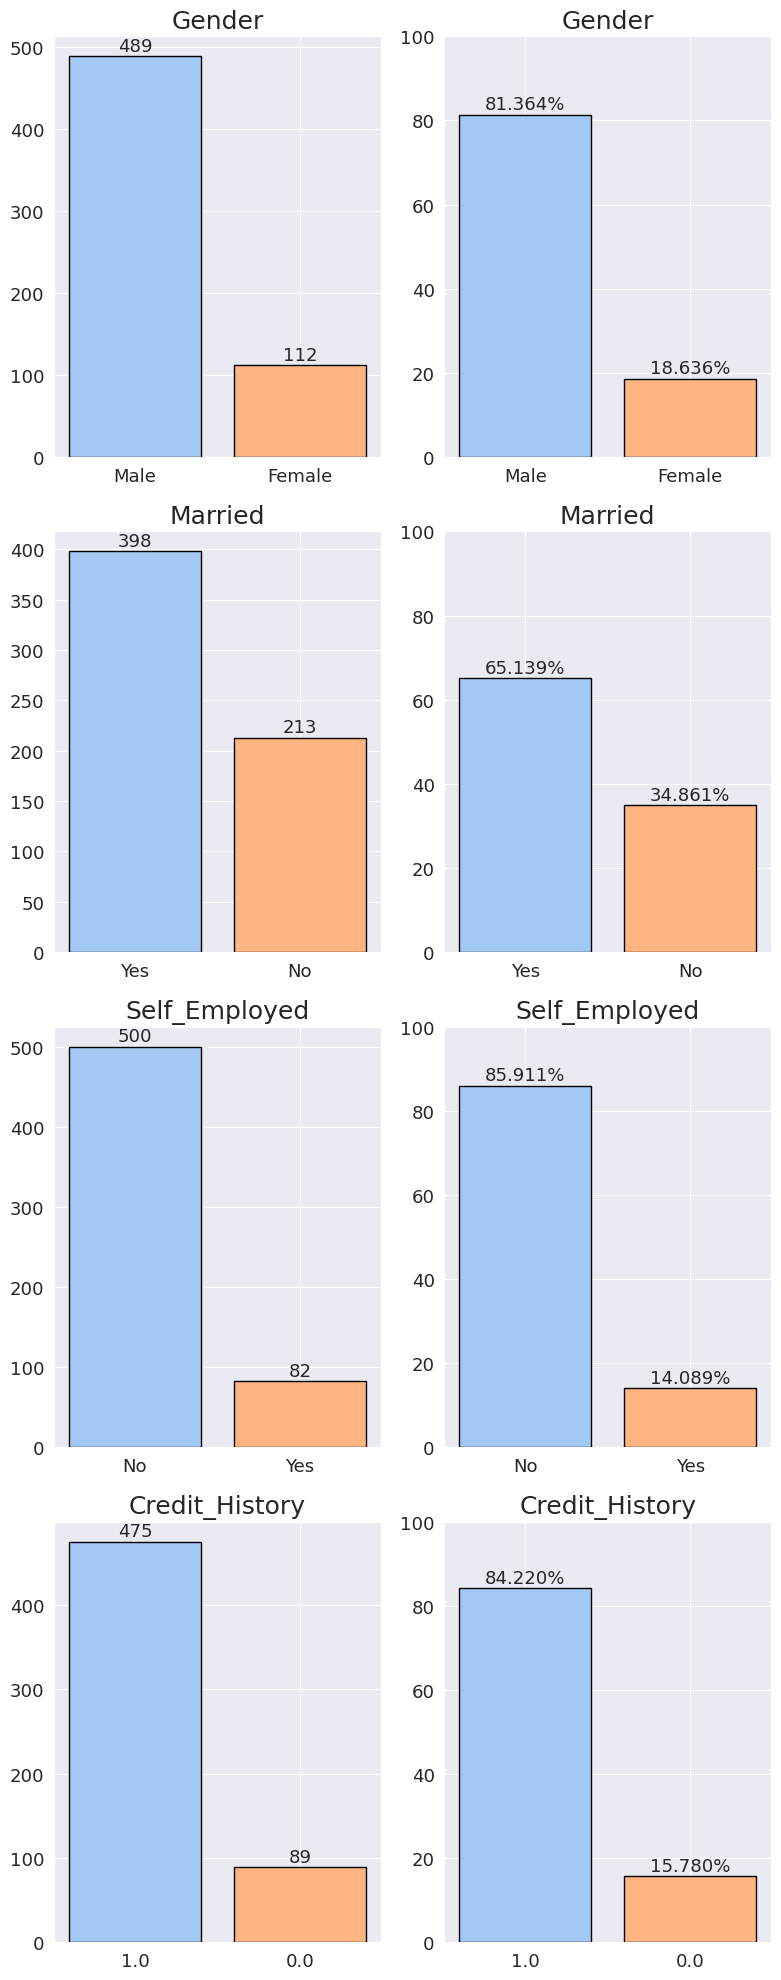

In [15]:
# https://www.w3schools.com/python/matplotlib_subplot.asp

# plot 1 (Gender)
fig=plt.figure(figsize=(8,20))
plt.subplot(4,2,1)
bar_plot(train["Gender"], "v", "f")
plt.subplot(4,2,2)
bar_plot(train["Gender"], "v", "p")

# plot 2 (Married)
plt.subplot(4,2,3)
bar_plot(train["Married"], "v", "f")
plt.subplot(4,2,4)
bar_plot(train["Married"], "v", "p")

# plot 3 (Self_Employed)
plt.subplot(4,2,5)
bar_plot(train["Self_Employed"], "v", "f")
plt.subplot(4,2,6)
bar_plot(train["Self_Employed"], "v", "p")

# plot 4 (Credit_History)
plt.subplot(4,2,7)
bar_plot(train["Credit_History"], "v", "f")
plt.subplot(4,2,8)
bar_plot(train["Credit_History"], "v", "p")

### It can be inferred from the above bar plots that:

    1. 81% of applicants in the dataset are male.
    2. Around 65% of the applicants in the dataset are married.
    3. About 14% of applicants in the dataset are self-employed.
    4. About 84% of applicants have repaid their debts.
    
### Now let’s visualize the ordinal variables: (Dependents, Education, Property_Area)

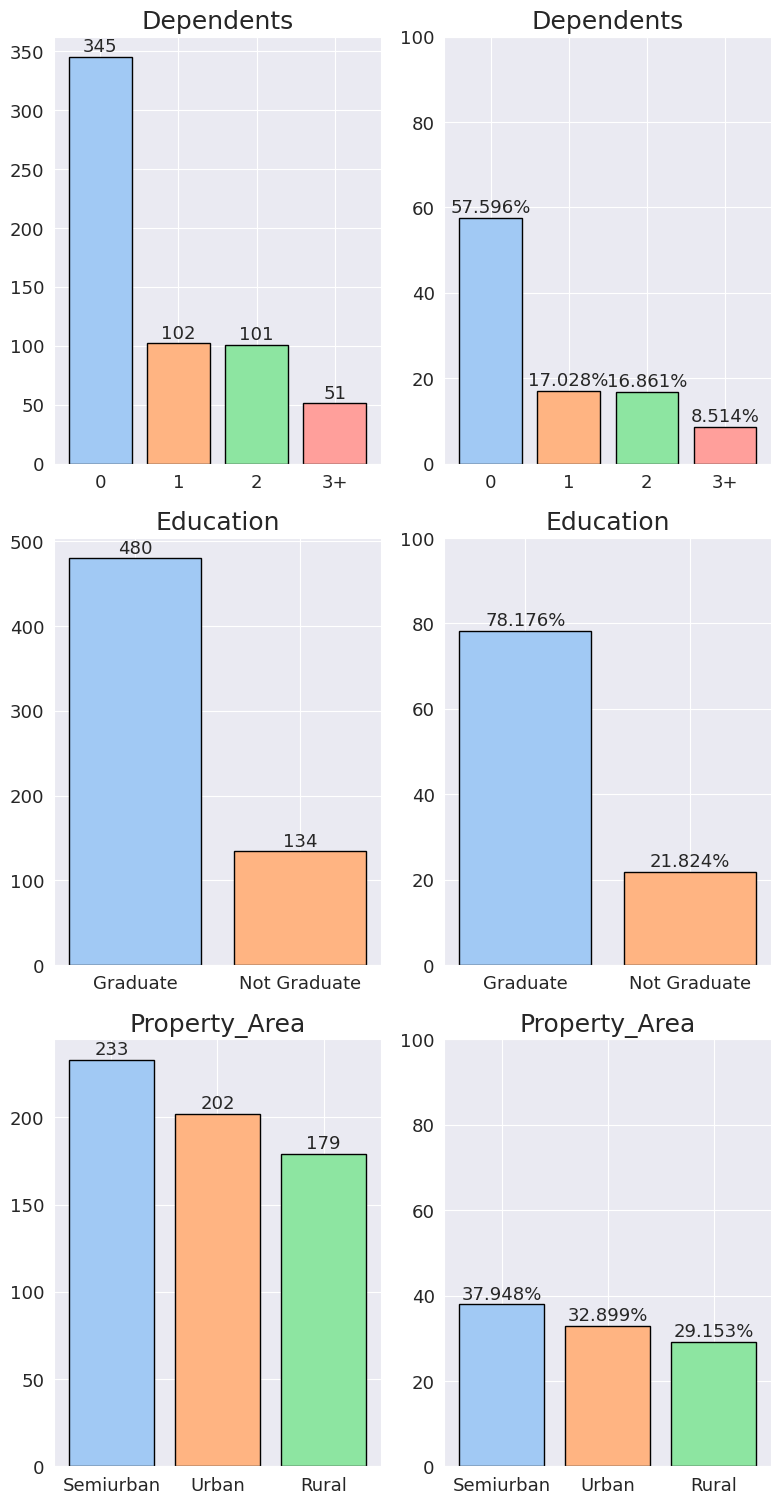

In [16]:
fig=plt.figure(figsize=(8,30))
plt.subplot(6,2,1)
bar_plot(train["Dependents"], "v", "f")
plt.subplot(6,2,2)
bar_plot(train["Dependents"], "v", "p")

plt.subplot(6,2,3)
bar_plot(train["Education"], "v", "f")
plt.subplot(6,2,4)
bar_plot(train["Education"], "v", "p")

plt.subplot(6,2,5)
bar_plot(train["Property_Area"], "v", "f")
plt.subplot(6,2,6)
bar_plot(train["Property_Area"], "v", "p")

### Following inferences can be made from the above bar plots:

    1. Most of the applicants don’t have dependents.
    2. About 79% of the applicants are graduates.
    3. Most of the applicants are from semi-urban areas.
    
### Now, let's vizualize the Independent Variable (Numerical):

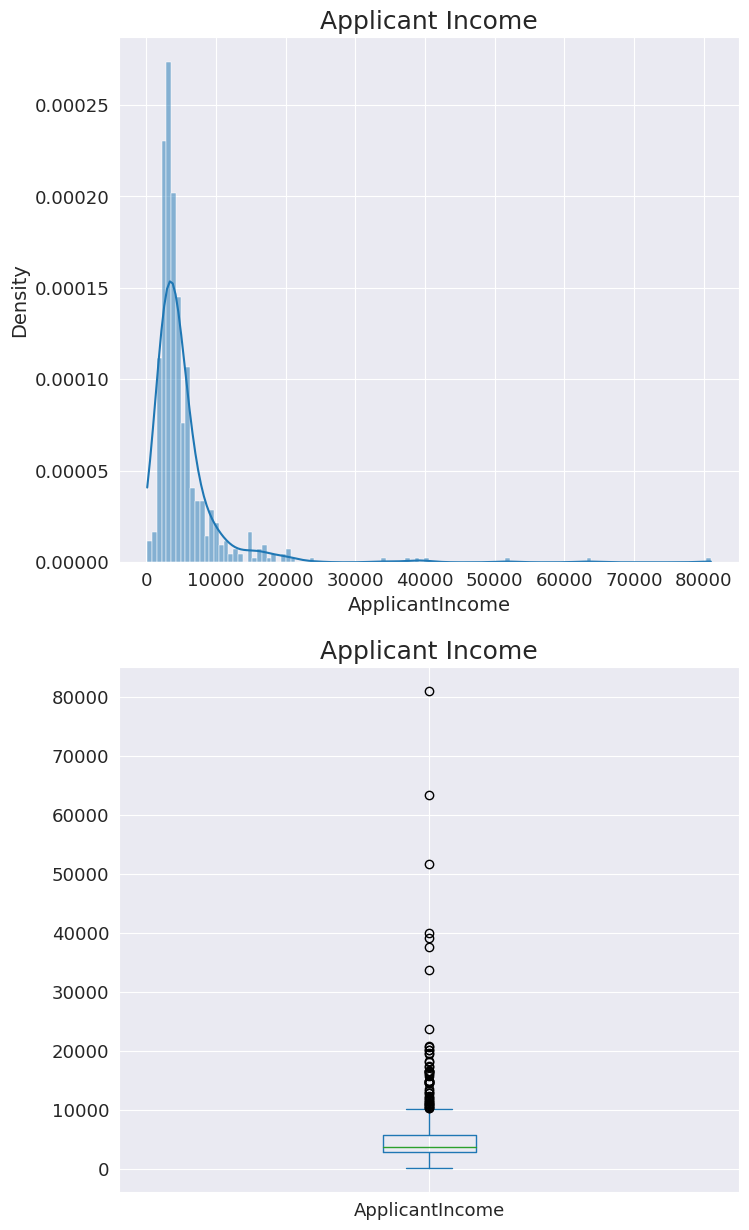

In [17]:
plt.figure(figsize = (8, 15))
plt.subplot(2, 1, 1)
plt.title("Applicant Income")
sns.histplot(train["ApplicantIncome"], kde=True, stat="density")

plt.subplot(2, 1, 2)
plt.title("Applicant Income")
train["ApplicantIncome"].plot.box();

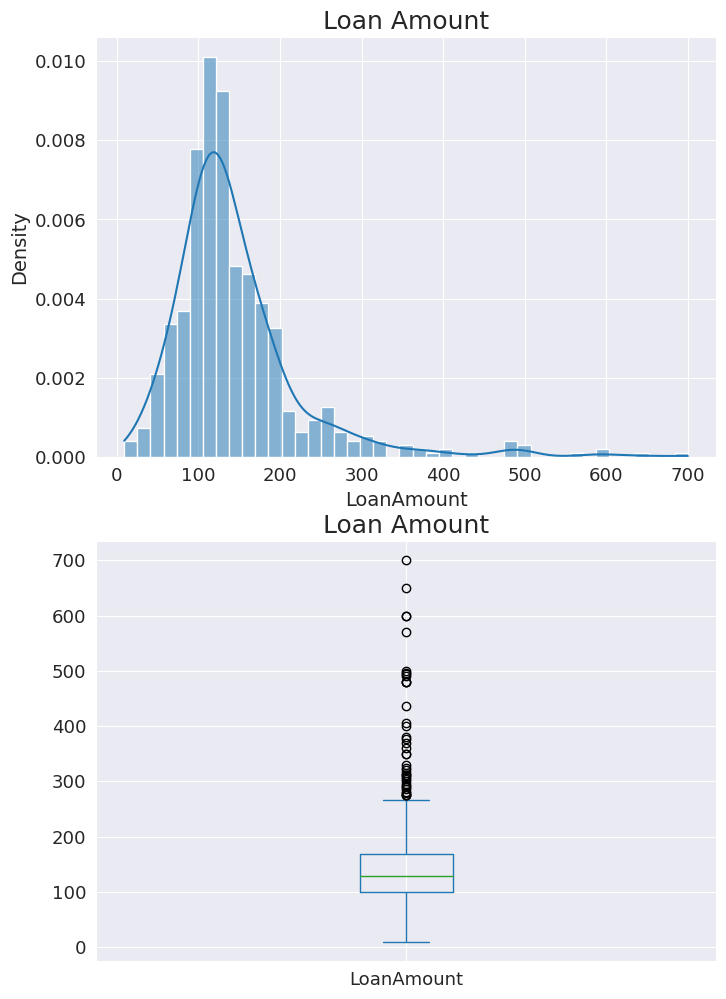

In [18]:
plt.figure(figsize = (8, 12))
plt.subplot(2, 1, 1)
plt.title("Loan Amount")
sns.histplot(train["LoanAmount"], kde=True, stat="density")

plt.subplot(2, 1, 2)
plt.title("Loan Amount")
train["LoanAmount"].plot.box();

### Categorical Independent Variable vs Target Variable

First of all, we will find the relation between the target variable and categorical independent variables. Let us look at the grouped bar plot now which will give us the proportion of approved and unapproved loans. We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections. Now we would like to know how well each feature correlates with Loan Status. So, in the next section, we will look at the bivariate analysis.

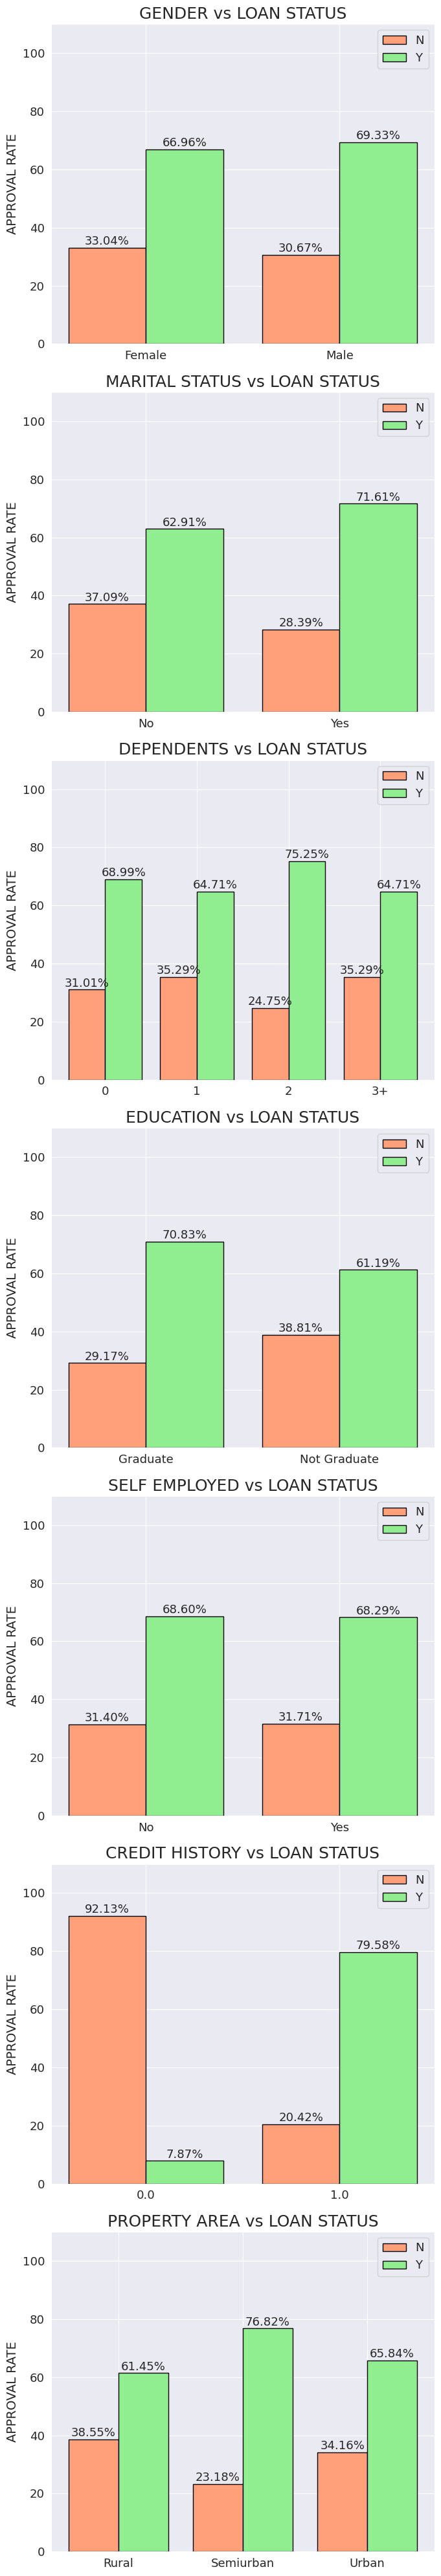

In [19]:
# Creating a cross table to grapsh
gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
married=pd.crosstab(train['Married'],train['Loan_Status']) 
dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
education=pd.crosstab(train['Education'],train['Loan_Status']) 
self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 

fig=plt.figure(figsize=(7,40))
plt.subplot(7,1,1)
groupped_bar(gender,"GENDER", "p")

plt.subplot(7,1,2)
groupped_bar(married, "MARITAL STATUS", "p")

plt.subplot(7,1,3)
groupped_bar(dependents, "DEPENDENTS", "p")

plt.subplot(7,1,4)
groupped_bar(education, "EDUCATION", "p")

plt.subplot(7,1,5)
groupped_bar(self_Employed, "SELF EMPLOYED", "p")

plt.subplot(7,1,6)
groupped_bar(Credit_History, "CREDIT HISTORY", "p")

plt.subplot(7,1,7)
groupped_bar(Property_Area, "PROPERTY AREA", "p")

In [20]:
gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


### We can infer:

    1. The proportion of married applicants is higher for the approved loans.
    2. The distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
    3. There is nothing significant we can infer from Self_Employed vs Loan_Status plot.
    4. It seems people with a credit history of 1 are more likely to get their loans approved.
    5. The proportion of loans getting approved in semi-urban areas is higher as compared to that in rural or urban areas.
    
Now let’s visualize numerical independent variables with respect to the target variable.

### Numerical Independent Variable vs Target Variable:

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

In [21]:
# train.isna().sum()
# Showing the data frame:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


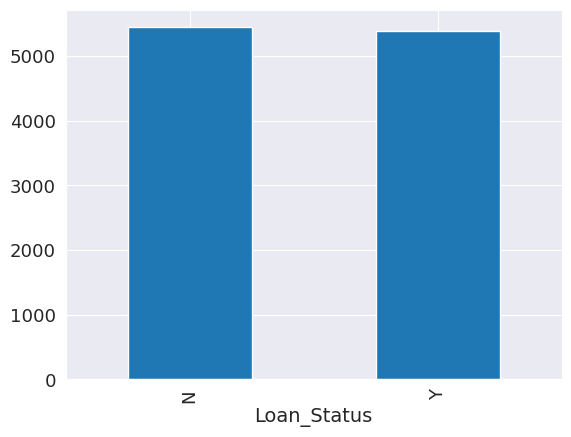

In [22]:
applicantIncome = train.groupby("Loan_Status")["ApplicantIncome"].mean().plot.bar()

We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

As we can see, there are outliers. We have a mean of 5403.46, but a min value of 150 and max value of 81000. Which is pointing out to ourliers. We can see it clearly in the following plot


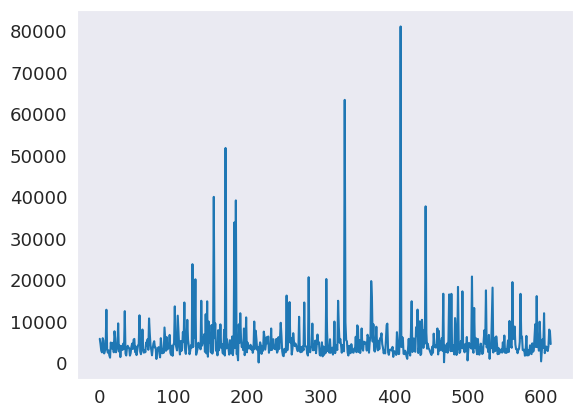

In [23]:
# Anaylizing the data:
train['ApplicantIncome'].plot()
plt.grid()
print(f'As we can see, there are outliers. We have a mean of {np.around(train["ApplicantIncome"].mean(),2)}, but a min value of {train["ApplicantIncome"].min()} and max value of {train["ApplicantIncome"].max()}. Which is pointing out to ourliers. We can see it clearly in the following plot') 

In [24]:
# LET'S CREATE A CUT ARRAY, TO SEE IN A MUCH BETTER WAY THE CANDIDATES INCOME VS THE APPROVAL RATE:

# label = ['Low','Average','High', 'Very high'] 

bins = [0, 2500, 4000, 6000, 81000] 
label =['Low','Average','High', 'Very high'] 


# PUTTING IT ALL TOGETHER
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels = label) # Adding this new value to the dataframe
# train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels=group)
# SAME AS THE STEP BEFORE. WE ARE CROSSING VALUES TO GRAPH THEM
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 

Income_bin

# https://blog.finxter.com/how-to-plot-matplotlibs-color-palette-and-choose-your-plot-color/

Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
High,45,98
Very high,46,91


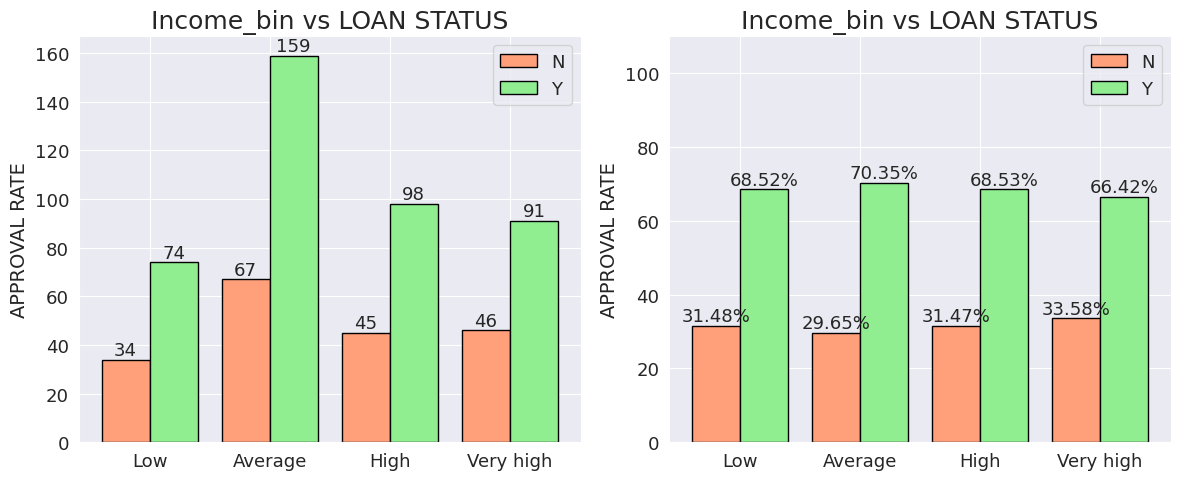

In [25]:
# GRAPHING THE ELEMENTS

plt.figure(figsize =(12, 5))

plt.subplot(1, 2, 1)
groupped_bar(Income_bin, "Income_bin")

# groupped_bar(gender,"GENDER", "p")
plt.subplot(1, 2, 2)
groupped_bar(Income_bin, "Income_bin", "p")

It can be inferred that Applicant’s income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant’s income is high the chances of loan approval will also be high.

We will analyze the applicant’s income and loan amount variable in a similar manner.

As we can see, there are outliers. We have a mean of 1621.25, but a min value of 0.0 and max value of 41667.0. Which is pointing out to ourliers. We can see it clearly in the following plot


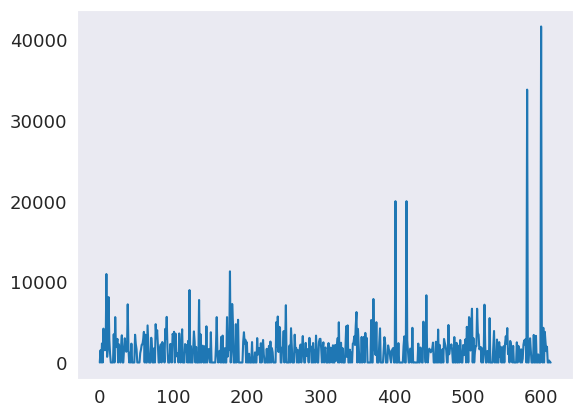

In [26]:
# Anaylizing the data:
train['CoapplicantIncome'].plot()
plt.grid()
print(f'As we can see, there are outliers. We have a mean of {np.around(train["CoapplicantIncome"].mean(),2)}, but a min value of {train["CoapplicantIncome"].min()} and max value of {train["CoapplicantIncome"].max()}. Which is pointing out to ourliers. We can see it clearly in the following plot') 

In [27]:
bins_1 = [0, 1000, 3000, 42000]
label = ['Low','Average','High'] 
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'], bins_1, labels = label)

# SAME AS THE STEP BEFORE. WE ARE CROSSING VALUES TO GRAPH THEM

Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin

Loan_Status,N,Y
Coapplicant_Income_bin,,
Low,3,19
Average,61,161
High,32,65


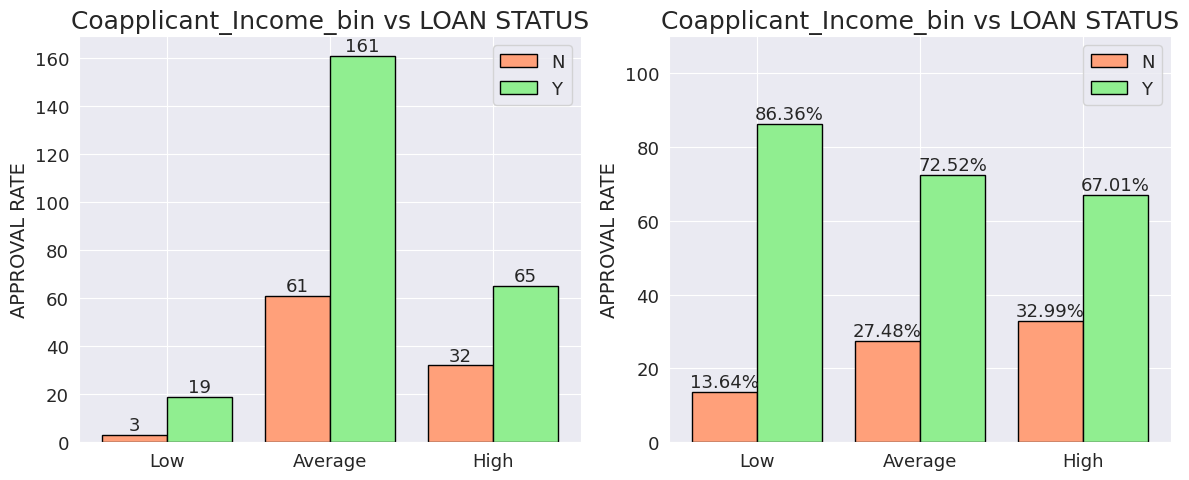

In [28]:
# GRAPHING THE ELEMENTS

plt.figure(figsize =(12, 5))

plt.subplot(1, 2, 1)
groupped_bar(Coapplicant_Income_bin, "Coapplicant_Income_bin")

plt.subplot(1, 2, 2)
groupped_bar(Coapplicant_Income_bin, "Coapplicant_Income_bin", "p")

It shows that if co-applicants income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any co-applicant so the co-applicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and co applicants’ income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Co-applicant Income and see the combined effect of Total Income on the Loan_Status.

As we can see, there are outliers. We have a mean of 7024.71, but a min value of 1442.0 and max value of 81000.0. Which is pointing out to ourliers. We can see it clearly in the following plot


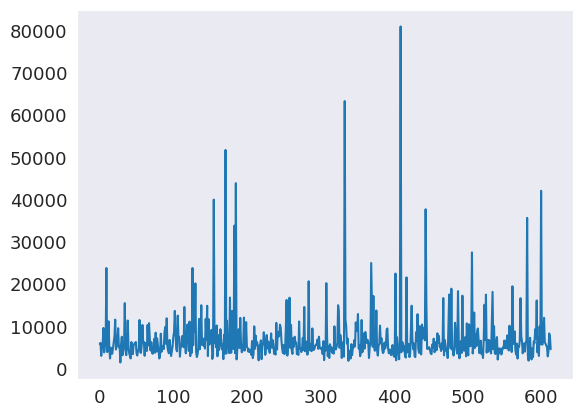

In [29]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

# Anaylizing the data:
train['Total_Income'].plot()
plt.grid()
print(f'As we can see, there are outliers. We have a mean of {np.around(train["Total_Income"].mean(),2)}, but a min value of {train["Total_Income"].min()} and max value of {train["Total_Income"].max()}. Which is pointing out to ourliers. We can see it clearly in the following plot') 

In [30]:
bins = [0,2500,4000,6000,81000]
label = ['Low','Average','High', 'Very high'] 
train['Total_Income_bin' ]= pd.cut(train['Total_Income'],bins,labels=label)

# SAME AS THE STEP BEFORE. WE ARE CROSSING VALUES TO GRAPH THEM
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin

Loan_Status,N,Y
Total_Income_bin,,
Low,14,10
Average,32,87
High,65,159
Very high,81,166


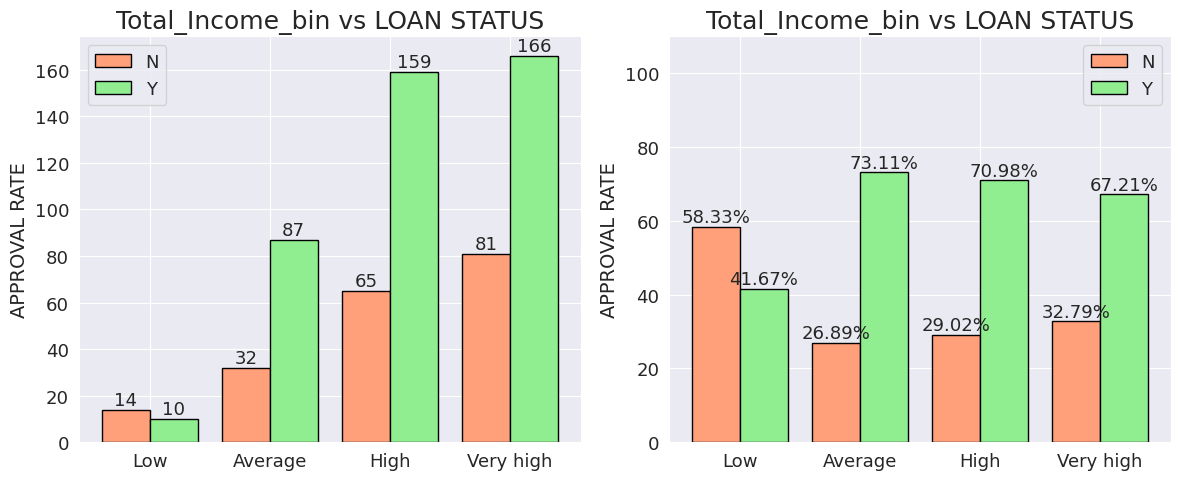

In [31]:
# GRAPHING THE ELEMENTS

plt.figure(figsize =(12, 5))

plt.subplot(1, 2, 1)
groupped_bar(Total_Income_bin, "Total_Income_bin")

plt.subplot(1, 2, 2)
groupped_bar(Total_Income_bin, "Total_Income_bin", "p")

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High, and Very High Income.

Let’s visualize the Loan amount variable.

As we can see, there are outliers. We have a mean of 146.41, but a min value of 9.0 and max value of 700.0. Which is pointing out to ourliers. We can see it clearly in the following plot


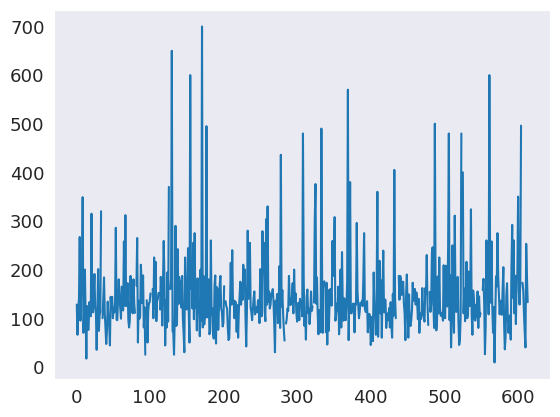

In [32]:
# Anaylizing the data:
train['LoanAmount'].plot()
plt.grid()
print(f'As we can see, there are outliers. We have a mean of {np.around(train["LoanAmount"].mean(),2)}, but a min value of {train["LoanAmount"].min()} and max value of {train["LoanAmount"].max()}. Which is pointing out to ourliers. We can see it clearly in the following plot') 

In [33]:
bins = [0,100,200,700] 
label = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bins,labels = label)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin

Loan_Status,N,Y
LoanAmount_bin,,
Low,47,107
Average,103,255
High,31,49


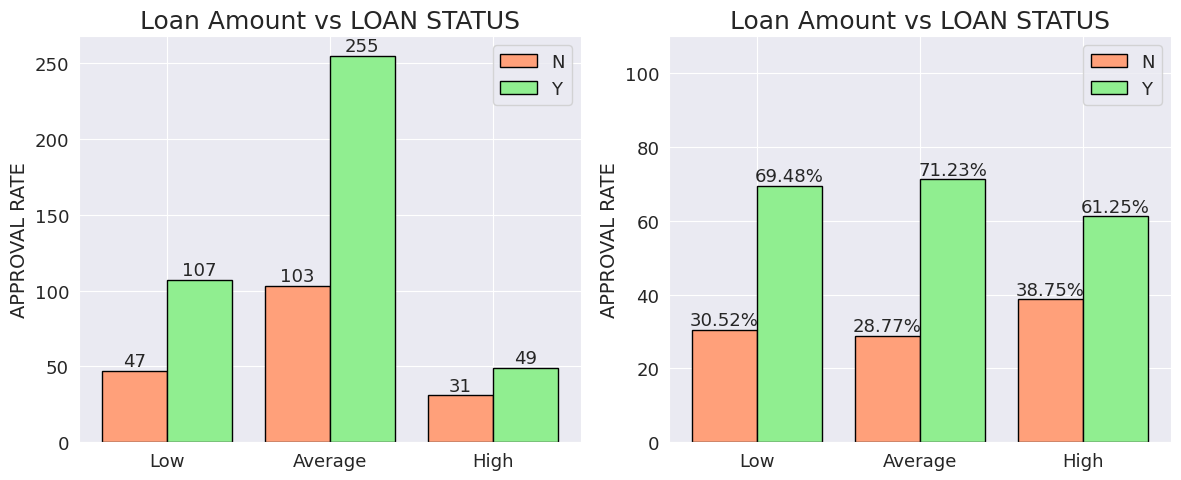

In [34]:
# GRAPHING THE ELEMENTS

plt.figure(figsize =(12, 5))

plt.subplot(1, 2, 1)
groupped_bar(LoanAmount_bin, "Loan Amount")

plt.subplot(1, 2, 2)
groupped_bar(LoanAmount_bin, "Loan Amount", "p")

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amounts as compared to that of High Loan Amounts which supports our hypothesis which considered that the chances of loan approval will be high when the loan amount is less.

Removing the variables we created to make the plots so we can analyze the original data.

In [35]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin',
 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [36]:
print(train["Loan_Status"].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


In [37]:
print(train["Dependents"].value_counts())

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [38]:
# Checking the indexes
print(train["Dependents"].value_counts().index.values)
print(train["Loan_Status"].value_counts().index.values)

['0' '1' '2' '3+']
['Y' 'N']


#### We can see that the indexes are strings so we need to remove them

In [39]:
# # Removing the labels

train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

# Just checking
print((train["Dependents"].value_counts().index.values))
print(train["Loan_Status"].value_counts().index.values)

['0' '1' '2' 3]
[1 0]


#### Now we have them in numeric fashion.

Now let’s look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker colors mean their correlation is more.

/tmp/ipykernel_24925/558431235.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = train.corr()


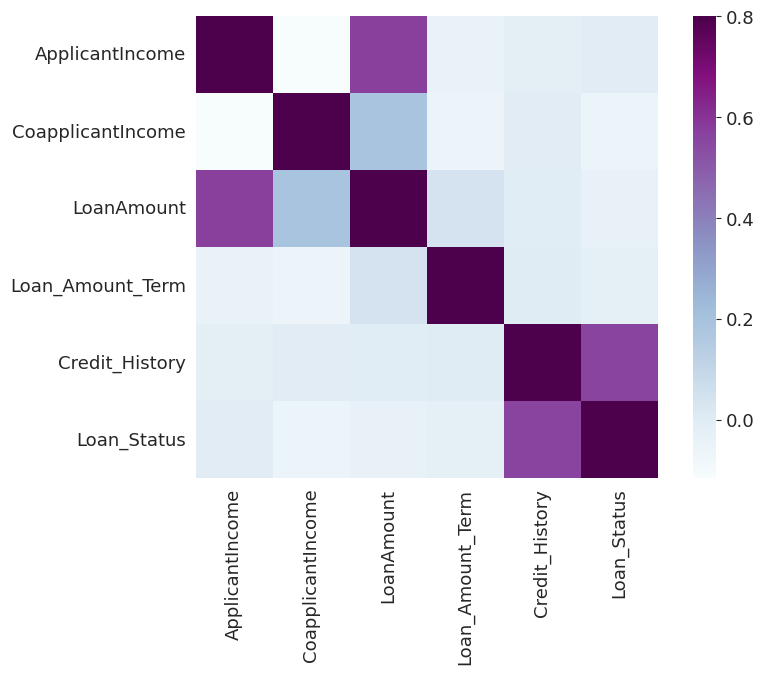

In [40]:
matrix = train.corr()
ax = plt.subplots(figsize = (9, 6))
sns.heatmap(matrix, vmax = .8, square = True, cmap = "BuPu");

We see that the most correlated variables are (ApplicantIncome – LoanAmount) and (Credit_History – Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

# Missing Value and Outlier Treatment

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can adversely affect the model performance.

### Missing Value Imputation

Let’s list out the feature-wise count of missing values.

In [41]:
train.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
Loan_ID               0
CoapplicantIncome     0
ApplicantIncome       0
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.

#### We can consider these methods to fill the missing values:

    1. For numerical variables: imputation using mean or median
    2. For categorical variables: imputation using mode
    
Let's check who it is:

In [42]:
# Getting the variables (train):
categorical_variables_train = train.select_dtypes(include = "object")
numerical_variables_train = train.select_dtypes(exclude = "object")

print(f"CATEGORICAL VARIABLES:\n\n{categorical_variables_train.isna().sum().sort_values(ascending = False)}")
print(f"\nNUMERICAL VARIABLES:\n\n{numerical_variables_train.isna().sum().sort_values(ascending = False)}\n")

# Removing the NAs with one function for the train section: (mode for strings and median for numbers)
fill_na(train)

print(f"FINAL DATAFRAME:\n\n{train.isna().sum()}")

CATEGORICAL VARIABLES:

Self_Employed    32
Dependents       15
Gender           13
Married           3
Loan_ID           0
Education         0
Property_Area     0
dtype: int64

NUMERICAL VARIABLES:

Credit_History       50
LoanAmount           22
Loan_Amount_Term     14
ApplicantIncome       0
CoapplicantIncome     0
Loan_Status           0
dtype: int64

FINAL DATAFRAME:

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [43]:
# Getting the variables (test):
categorical_variables_test = test.select_dtypes(include = "object")
numerical_variables_test = test.select_dtypes(exclude = "object")

print(f"CATEGORICAL VARIABLES:\n\n{categorical_variables_test.isna().sum().sort_values(ascending = False)}")
print(f"\nNUMERICAL VARIABLES:\n\n{numerical_variables_test.isna().sum().sort_values(ascending = False)}\n")

# Removing the NAs with one function for the train section: (mode for strings and median for numbers)
fill_na(test)

print(f"FINAL DATAFRAME:\n\n{test.isna().sum()}")

CATEGORICAL VARIABLES:

Self_Employed    23
Gender           11
Dependents       10
Married           0
Loan_ID           0
Education         0
Property_Area     0
dtype: int64

NUMERICAL VARIABLES:

Credit_History       29
Loan_Amount_Term      6
LoanAmount            5
ApplicantIncome       0
CoapplicantIncome     0
dtype: int64

FINAL DATAFRAME:

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much but reduces the larger values. So, we get a distribution similar to the normal distribution.

Let’s visualize the effect of log transformation. We will do similar changes to the test data simultaneously.

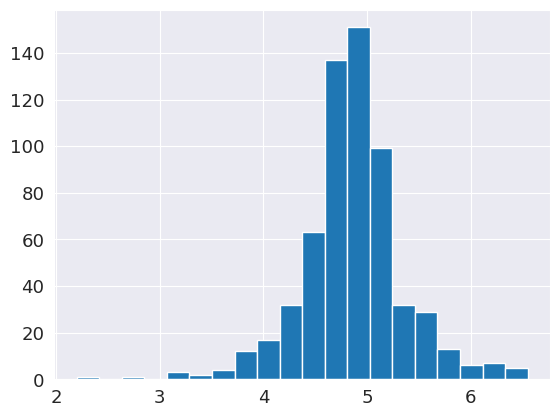

In [44]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

# Evaluation Metrics for Classification



The process of model building is not complete without the evaluation of model performance. Since this is a classification problem, we can evaluate our models using any one of the following evaluation metrics. Let us understand it using the confusion matrix which is a tabular representation of Actual vs Predicted values. This is what a confusion matrix looks like:
    
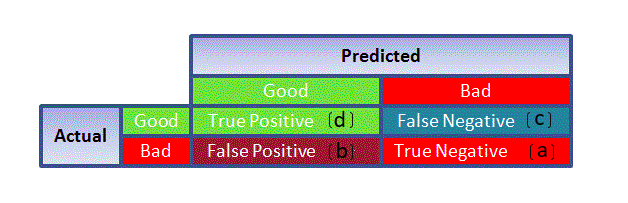

- True Positive – Targets which are actually true(Y) and we have predicted them as true(Y)
- True Negative – Targets that are actually false(N) and we have predicted them as false(N)
- False Positive – Targets that are actually false(N) but we have predicted them as true(T)
- False Negative – Targets that are actually true(T) but we have predicted them as false(N)

**_NOTE: Using these values, we can calculate the accuracy of the model._** 

### Definitions:

- **Accuracy**: From all the classes (positive and negative), how many of them we have predicted correctly. In this case. Accuracy should be high as possible. Using these values, we can calculate the accuracy of the model.


- **Precision:** It is a measure of correctness achieved in true prediction i.e. of observations labeled as true, how many are actually labeled true.


- **Recall (Sensitivity):** It is a measure of actual observations which are predicted correctly i.e. how many observations of true class are labeled correctly. It is also known as ‘Sensitivity’.


- **Specificity:** It is a measure of how many observations of false class are labeled correctly.


**_NOTE: Specificity and Sensitivity play a crucial role in deriving the ROC curve. We can calculate these metrics as shown bellow:_**

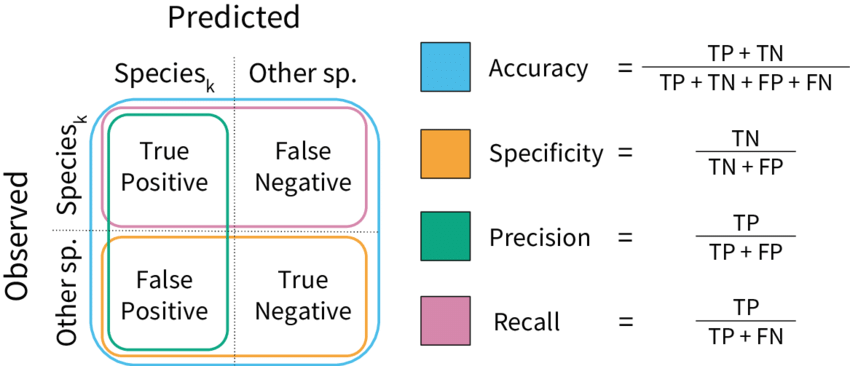

- **Receiver Operating Characteristic(ROC):** summarizes the model’s performance by evaluating the trade-offs between true positive rate (sensitivity) and false-positive rate(1- specificity).


- **The area under the curve (AUC):** referred to as an index of accuracy(A) or concordance index, is a perfect performance metric for the ROC curve. Higher the area under the curve, the better the prediction power of the model. This is what a ROC curve looks like:

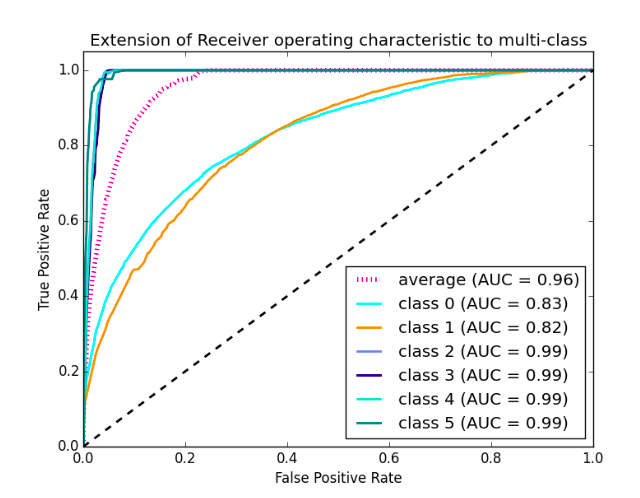


The area of this curve measures the ability of the model to correctly classify true positives and true negatives. We want our model to predict the true classes as true and false classes as false.


So it can be said that we want the true positive rate to be 1. But we are not concerned with the true positive rate only but the false positive rate too. We are not only concerned about predicting the Y classes as Y but we also want N classes to be predicted as N.

We want to increase the area of the curve which will be maximum for classes 2,3,4 and 5 in the above example.

For class 1 when the false positive rate is 0.2, the true positive rate is around 0.6. But for class 2 the true positive rate is 1 at the same false-positive rate. So, the AUC for class 2 will be much more as compared to the AUC for class 1. So, the model for class 2 will be better.
    The class 2,3,4 and 5 models will predict more accurately as compared to the class 0 and 1 models as the AUC is more for those classes.

For more informaiton, we can check this out: https://www.geeksforgeeks.org/auc-roc-curve/
